# Statistical Data Visualization Q1.a

In [1]:
# importing necessary libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import scipy.stats as ss

In [2]:
# importing datasets

data = pd.read_csv('C:\\Users\\vaibh\\Desktop\\360 Digitmg\\Statistical Data Visualization\\Q1_a.csv')

In [3]:
# Checking the features
data.head()

,Index,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [4]:
# Dropping irrelevant feature
data.drop(['Index'], axis = 1, inplace = True)

In [5]:
# Shape of dataset
data.shape

(50, 2)

In [6]:
# Check for null values
x = data.isnull().sum() ; print(x)

speed    0
dist     0
dtype: int64


There are no null values

In [7]:
# Check for duplicate values
data.duplicated().sum() 

1

There is one duplicate value

In [8]:
# Dropping duplicate values
data.drop_duplicates(inplace = True,ignore_index=True)

In [9]:
data.isna().sum()

speed    0
dist     0
dtype: int64

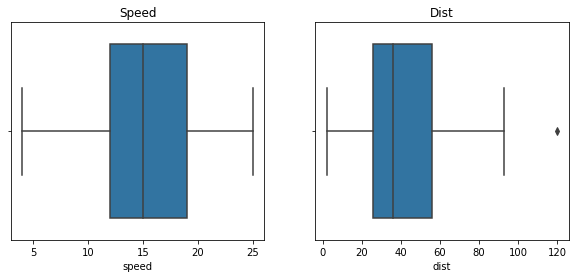

In [10]:
# Boxplot for outliers
plt.subplots(1,2,figsize=(10,4))
plt.subplot(121) ; sns.boxplot(x = data.iloc[:,0]);plt.title('Speed');
plt.subplot(122) ; sns.boxplot(x = data.iloc[:,1]);plt.title('Dist');

Dist feature has outliers

In [11]:
# Removing outliers

IQR = data['dist'].quantile(0.75) - data['dist'].quantile(0.25)
low_end = data['dist'].quantile(0.25) - (1.5*IQR);print(low_end)
upper_end = data['dist'].quantile(0.75) + (1.5*IQR);print(upper_end)
data['dist'] = pd.DataFrame(np.where(data['dist'] > upper_end,upper_end, 
                      np.where(data['dist'] < 0,0,data['dist'])))

-19.0
101.0


In [12]:
data.isna().sum()

speed    0
dist     0
dtype: int64

In [13]:
# Mean, Median, Mode, Variance, Standard Deviation, Kurtosis and Skewness
for column in data.columns:
    mean = np.round(np.mean(data[column]),2); print('Mean[{}] : {}'.format(column,mean));
    median = np.median(data[column]); print('Median[{}] : {}'.format(column,median));
    mode = stat.mode(data[column]); print('Mode[{}] : {}'.format(column,mode));
    variance = np.round(np.var(data[column]),2); print('Variance[{}] : {}'.format(column,variance));
    std = np.round(np.std(data[column]),2); print('Std[{}] : {}'.format(column,std));
    kur = np.round(ss.kurtosis(data[column]),2); print('Kurtosis[{}] : {}'.format(column,kur));
    skew = np.round(ss.skew(data[column]),2); print('Skewness[{}] : {}'.format(column,skew));
    print('\n')

Mean[speed] : 15.45
Median[speed] : 15.0
Mode[speed] : 20
Variance[speed] : 27.84
Std[speed] : 5.28
Kurtosis[speed] : -0.6
Skewness[speed] : -0.14


Mean[dist] : 42.78
Median[dist] : 36.0
Mode[dist] : 26.0
Variance[dist] : 610.01
Std[dist] : 24.7
Kurtosis[dist] : -0.52
Skewness[dist] : 0.55




The skewness and kurtosis for the given features are acceptable.

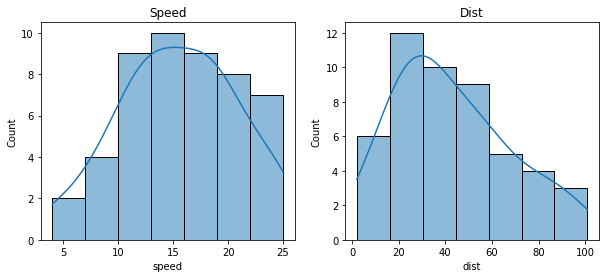

In [15]:
# Distplot of the features
plt.subplots(1,2,figsize=(10,4))
plt.subplot(121) ; sns.histplot(x = data.iloc[:,0],kde = 1);plt.title('Speed');
plt.subplot(122) ; sns.histplot(x = data.iloc[:,1],kde = 1);plt.title('Dist');

The features are normally distributed.